# Orthogonality

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
import pandas as pd
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
print('')

In [2]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

%Set up useful MathJax (Latex) macros.
%See http://docs.mathjax.org/en/latest/tex.html#defining-tex-macros
%These are for use in the slideshow
$\newcommand{\mat}[1]{\left[\begin{array}#1\end{array}\right]}$
$\newcommand{\vx}{{\mathbf x}}$
$\newcommand{\hx}{\hat{\mathbf x}}$
$\newcommand{\vbt}{{\mathbf\beta}}$
$\newcommand{\vy}{{\mathbf y}}$
$\newcommand{\vz}{{\mathbf z}}$
$\newcommand{\R}{{\mathbb{R}}}$
$\newcommand{\vu}{{\mathbf u}}$
$\newcommand{\vv}{{\mathbf v}}$
$\newcommand{\vw}{{\mathbf w}}$
$\newcommand{\col}{{\operatorname{Col}}}$
$\newcommand{\nul}{{\operatorname{Nul}}}$
$\newcommand{\vb}{{\mathbf b}}$
$\newcommand{\va}{{\mathbf a}}$
$\newcommand{\ve}{{\mathbf e}}$
$\newcommand{\setb}{{\mathcal{B}}}$
$\newcommand{\rank}{{\operatorname{rank}}}$
$\newcommand{\vp}{{\mathbf p}}$

Today we'll start to bring __geometry__ to center stage in our discussion.

We'll concern ourselves with simple notions:  length, distance, perpendicularity, and angle.  

However we will take these notions that are familiar from our 3D world and see how to define them for spaces of arbitrary dimension, ie, $\R^n$.

To start, we'll return to and review the __inner product.__

## Inner Product (Review)

Recall that we consider vectors such as $\vu$ and $\vv$ in $\R^n$ to be $n\times1$ matrices.  

Then $\vu^T\vv$ is a scalar, called the __inner product__ of $\vu$ and $\vv.$

You will also see this called the __dot product__.   It sometimes written as $\vu \mathbf{\cdot} \vv$ but we will always write  $\vu^T\vv.$

The inner product is the sum of the componentwise product of $\vu$ and $\vv$.

If $\vu = \mat{{c}u_1\\u_2\\\vdots\\u_n}$ and $\vv = \mat{{c}v_1\\v_2\\\vdots\\v_n},$ then the inner product of $\vu$ and $\vv$ is:

$$\vu^T\vv = \mat{{cccc}u_1&u_2&\dots&u_n}\mat{{c}v_1\\v_2\\\vdots\\v_n} = u_1v_1 + u_2v_2 + \dots + u_nv_n = \sum_{i=1}^n u_iv_i.$$

Let's remind ourselves of the properties of the inner product:

__Theorem.__  Let $\vu$,$\vv$, and $\vw$ be vectors in $\R^n$, and let $c$ be a scalar.  Then:

1. $\vu^T\vv = \vv^T\vu$
2. $(\vu+\vv)^T\vw = \vu^T\vw + \vv^T\vw$
3. $(c\vu)^T\vv = c(\vu^T\vv) = \vu^T(c\vv)$
4. $\vu^T\vu \geq 0,\;\;\;\mbox{and}\;\vu^T\vu = 0\;\mbox{if and only if}\;\vu = 0$

The first three are restatements of facts about matrix-vector products.

The last one is straightforward, but important.

## Vector Norm

If $\vv$ is in $\R^n$, with entries $v_1,\dots,v_n,$ then the square root of $\vv^T\vv$ is defined because $\vv^T\vv$ is nonnegative.

__Definition.__ The __norm__ of $\vv$ is the nonnegative scalar $\Vert\vv\Vert$ defined by

$$\Vert\vv\Vert = \sqrt{\vv^T\vv} = \sqrt{v_1^2 + v_2^2 + \dots + v_n^2} = \sqrt{\sum_{i=1}^n{v_i}^2}.$$

The norm of $\vv$ is its __length__ in the usual sense.

This follows directly from the Pythagorean theorem:

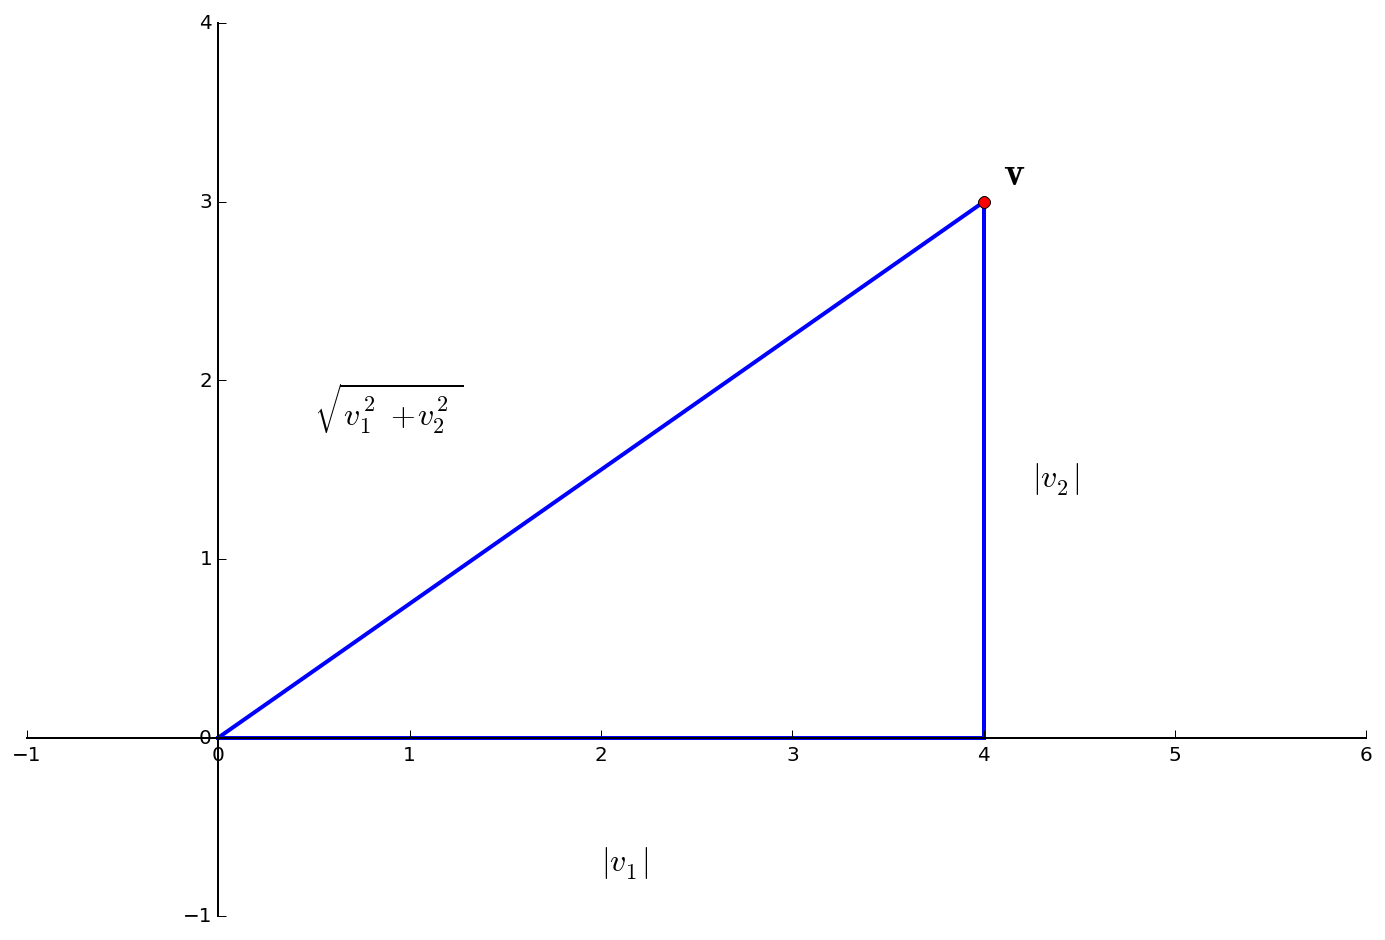

In [3]:
sl.hide_code_in_slideshow()
ax = ut.plotSetup(-1,6,-1,4,(12,8))
ut.centerAxes(ax)
pt = [4., 3.]
plt.plot([0,pt[0]],[0,pt[1]],'b-',lw=2)
plt.plot([pt[0],pt[0]],[0,pt[1]],'b-',lw=2)
plt.plot([0,pt[0]],[0,0],'b-',lw=2)
ut.plotVec(ax,pt)
ax.text(2,-0.75,r'$|v_1|$',size=16)
ax.text(4.25,1.4,r'$|v_2|$',size=16)
ax.text(0.5,1.75,r'$\sqrt{v_1^2+v_2^2}$',size=16)
ax.text(pt[0]+0.1,pt[1]+0.1,r'$\mathbf{v}$',size=20)
print('')

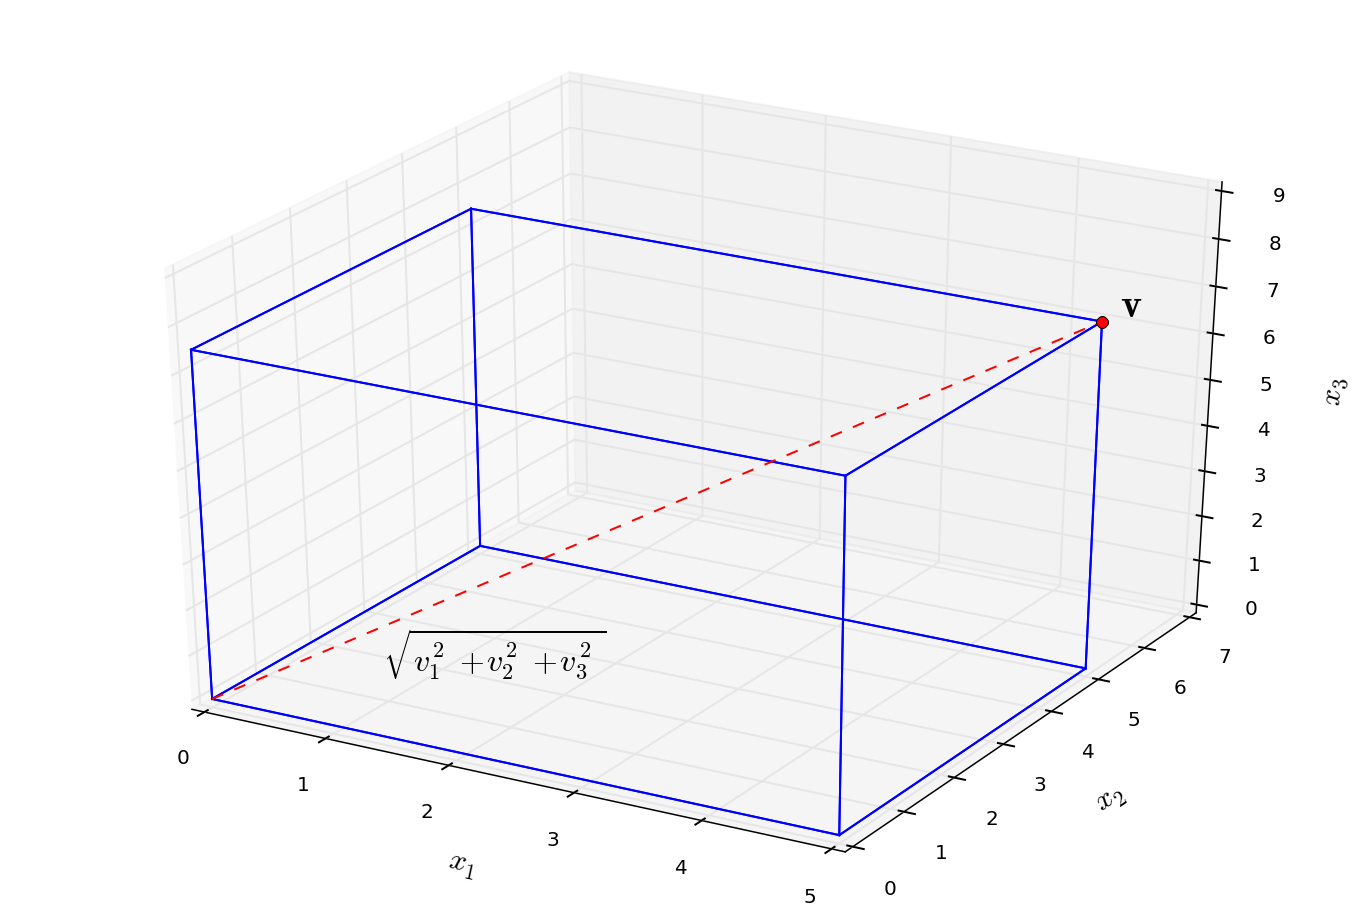

In [4]:
sl.hide_code_in_slideshow()
ax = ut.plotSetup3d(0,5,0,7,0,9,(12,8))
f = 1.25
v = [4*f,4*f,6*f]
ut.plotCube(ax,v)
ax.text(v[0]+.1,v[1]+.1,v[2]+.1,r'$\bf v$',size=20)
ax.plot([0,v[0]],[0,v[1]],'r--',zs=[0,v[2]])
ax.plot([v[0]],[v[1]],'ro',zs=[v[2]])
ax.text(0.5,2,-0.5,r'$\sqrt{v_1^2+v_2^2+v_3^2}$',size=16)
print('')

For any scalar $c$, the length of $c\vv$ is $|c|$ times the length of $\vv$.  That is,

$$\Vert c\vv\Vert = \vert c\vert\Vert\vv\Vert.$$

So, for example, $\Vert(-2)\vv\Vert = \Vert 2\vv\Vert$.

A vector of length 1 is called a __unit vector__.  

If we divide a nonzero vector $\vv$ by its length -- that is, multiply by $1/\Vert\vv\Vert$ -- we obtain a unit vector $\vu$.

We say that we have _normalized_ $\vv$, and that $\vu$ is _in the same direction_ as $\vv.$

__Example.__  Let $\vv = \mat{{r}1\\-2\\2\\0}.$  Find the unit vector $\vu$ in the same direction as $\vv.$

__Solution.__  

First, compute the length of $\vv$:

$$\Vert\vv\Vert^2 = \vv^T\vv = (1)^2 + (-2)^2 + (2)^2 + (0)^2 = 9$$

$$\Vert\vv\Vert = \sqrt{9} = 3$$

Then multiply $\vv$ by $1/\Vert\vv\Vert$ to obtain

$$\vu = \frac{1}{\Vert\vv\Vert}\vv = \frac{1}{3}\vv = \frac{1}{3}\mat{{r}1\\-2\\2\\0} = \mat{{r}1/3\\-2/3\\2/3\\0}$$

It's interesting that we can't actually visualize $\vu$ but we can still reason geometrically about it as a unit vector.

## Distance in $\R^n$

It's very useful to be able to talk about the __distance__ between two points (or vectors) in $\R^n$.

We can start from basics:

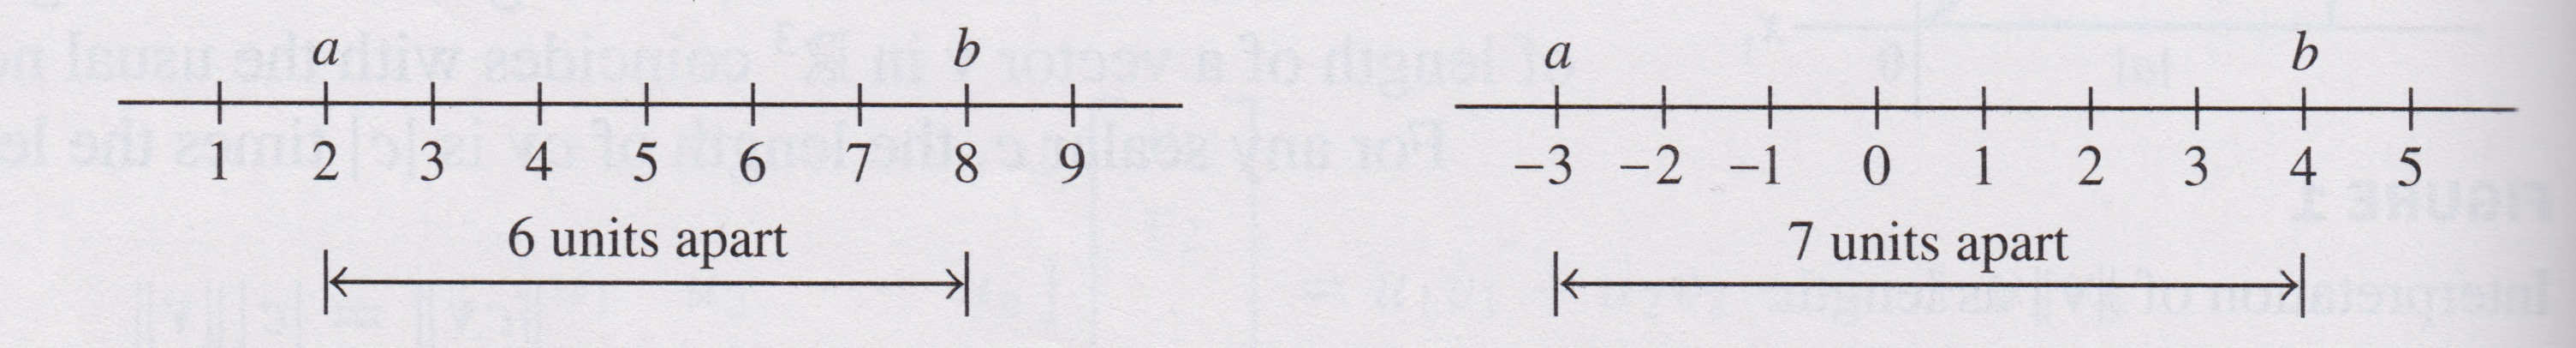

In [5]:
# image credit: Lay 4th edition figure 3 in Ch 6.1
sl.hide_code_in_slideshow()
display(Image("images/Lay-fig-6-1-3.jpg", width=700))

On the number line, the distance between two points $a$ and $b$ is $\vert a-b\vert$. 

The same is true in $\R^n$.

__Definition.__  For $\vu$ and $\vv$ in $\R^n,$ the __distance between $\vu$ and $\vv$,__ written as $\mbox{dist}(\vu,\vv),$ is the length of the vector $\vu-\vv$.  That is,

$$\mbox{dist}(\vu,\vv) = \Vert\vu-\vv\Vert.$$

This definition agrees with the usual formulas for the Euclidean distance between two points.  The usual formula is

$$\mbox{dist}(\vu,\vv) = \sqrt{(v_1-u_1)^2 + (v_2-u_2)^2 + \dots + (v_n-u_n)^2}.$$

Which you can see is equal to 

$$\Vert\vu-\vv\Vert = \sqrt{(\vu-\vv)^T(\vu-\vv)} = \sqrt{\mat{{cccc}u_1-v_1&u_2-v_2&\dots&u_n-v_n}\mat{{c}u_1-v_1\\u_2-v_2\\\vdots\\u_n-v_n}}$$

There is a geometric view as well. 

For example, consider the vectors $\vu = \mat{{c}7\\1}$ and $\vv = \mat{{c}3\\2}$ in $\R^2$.

Then one can see that the distance from $\vu$ to $\vv$ is the same as the length of the vector $\vu-\vv$.

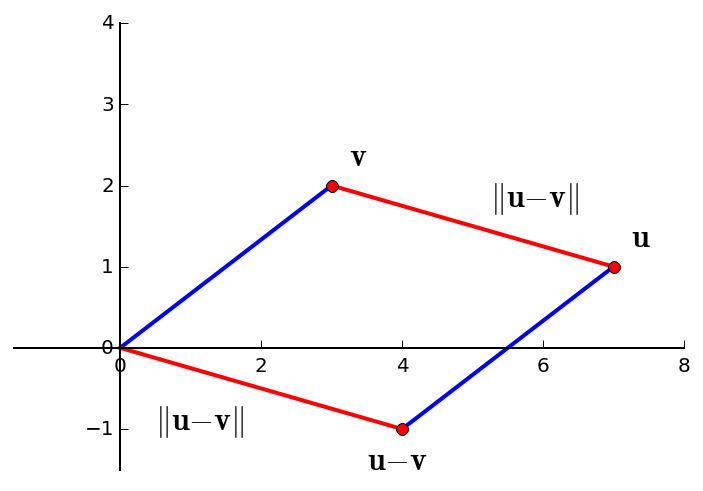

In [6]:
sl.hide_code_in_slideshow()
ax = ut.plotSetup(-1.5,8,-1.5,4)
ut.centerAxes(ax)
u = np.array([7., 1])
v = np.array([3., 2])
plt.plot([0,v[0]],[0,v[1]],'b-',lw=2)
ax.text(v[0]+0.25,v[1]+0.25,r'$\bf v$',size=16)
plt.plot([v[0],u[0]],[v[1],u[1]],'r-',lw=2)
ax.text(u[0]+0.25,u[1]+0.25,r'$\bf u$',size=16)
plt.plot([u[0],u[0]-v[0]],[u[1],u[1]-v[1]],'b-',lw=2)
ax.text(u[0]-v[0]-0.5,u[1]-v[1]-0.5,r'$\bf u-v$',size=16)
plt.plot([u[0]-v[0],0],[u[1]-v[1],0],'r-',lw=2)
ut.plotVec(ax,u-v)
ut.plotVec(ax,u)
ut.plotVec(ax,v)
m = (u-v)/2.0
mm = v + m
ax.text(m[0]-1.5,m[1]-0.5,r'$\Vert{\bf u-v}\Vert$',size=16)
ax.text(mm[0]+0.25,mm[1]+0.25,r'$\Vert{\bf u-v}\Vert$',size=16)
print('')

This shows that the distance between two vectors is the length of their difference.

## Question Time!  Q 20.1

## Orthogonal Vectors

Now we turn to another familiar notion from 2D geometry, which we'll generalize to $\R^n$: the notion of being __perpendicular.__

You may recall the classic method from Euclid for how to construct a line perpendicular to another line at a point:

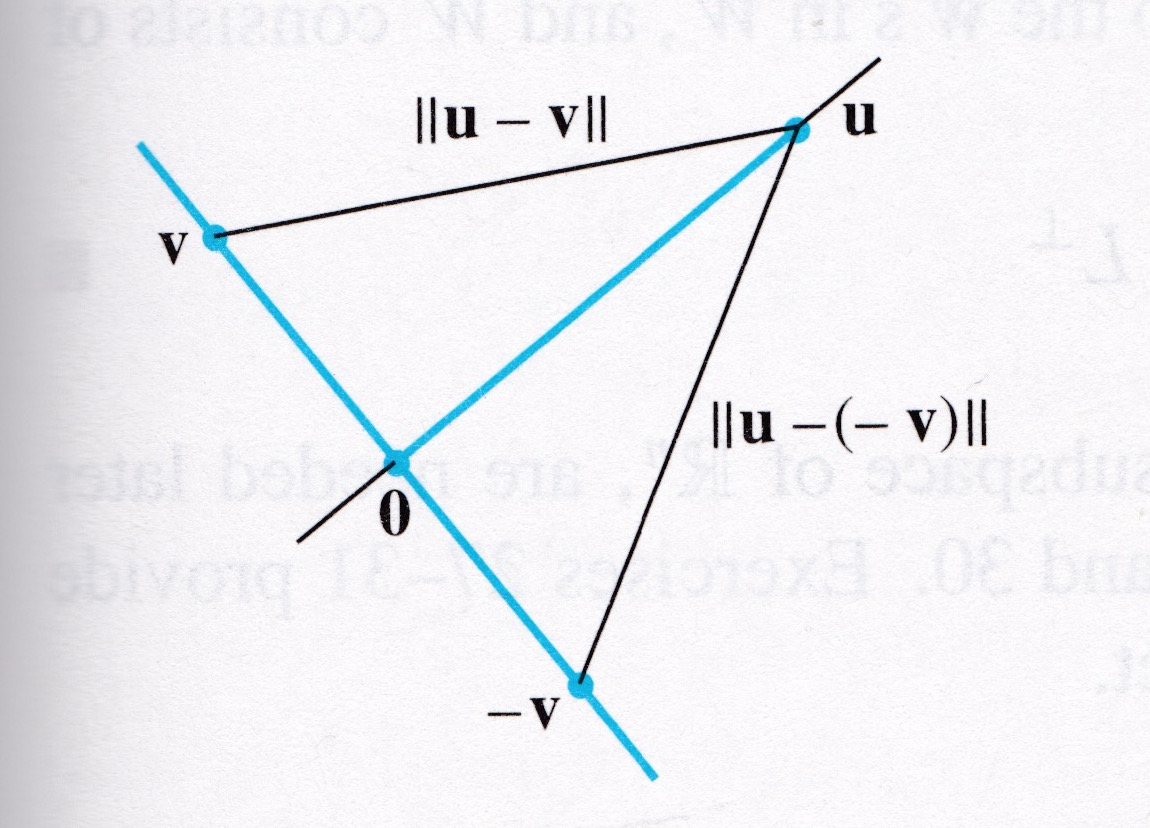

In [7]:
# image credit: Lay 4th edition figure 5 in Ch 6.1
sl.hide_code_in_slideshow()
display(Image("images/Lay-fig-6-1-5.jpg", width=550))

One constructs an isoceles triangle centered at the point.  Because the sides are equal, the two inner triangles are right triangles.

So the two blue lines are perpendicular if and only if the distance from $\vu$ to $\vv$ is equal to the distance from $\vu$ to $-\vv.$

This is the same as requiring the squares of their distances to be equal.

Let's see what this implies from an algebraic standpoint.  First we'll find the distance from $\vu$ to $-\vv$:

$$[\mbox{dist}(\vu,-\vv)]^2 = \Vert\vu-(-\vv)\Vert^2 = \Vert\vu+\vv\Vert^2$$

$$ = (\vu+\vv)^T(\vu+\vv)$$

$$ = \vu^T(\vu+\vv) + \vv^T(\vu+\vv)$$

$$ = \vu^T\vu + \vu^T\vv + \vv^T\vu + \vv^T\vv$$

$$ = \Vert\vu\Vert^2 + \Vert\vv\Vert^2 + 2\vu^T\vv$$

Now let's find the distance from $\vu$ to $\vv$:

$$[\mbox{dist}(\vu,\vv)]^2 = \Vert\vu-\vv\Vert^2$$

$$ = (\vu-\vv)^T(\vu-\vv)$$

$$ = \vu^T(\vu-\vv) - \vv^T(\vu-\vv)$$

$$ = \vu^T\vu - \vu^T\vv - \vv^T\vu + \vv^T\vv$$

$$ = \Vert\vu\Vert^2 + \Vert\vv\Vert^2 - 2\vu^T\vv$$

So $\mbox{dist}(\vu,\vv) = \mbox{dist}(\vu,-\vv)$ if and only if $\vu^T\vv = 0$.

So now we can define perpendicularity in $\R^n$:

__Definition.__  Two vectors $\vu$ and $\vv$ in $\R^n$ are __orthogonal__ to each other if $\vu^T\vv = 0.$

This also allows us to restate the Pythagorean Theorem:
    
__Theorem.__  Two vectors $\vu$ and $\vv$ are orthogonal if and only if $\Vert\vu+\vv\Vert^2 = \Vert\vu\Vert^2 + \Vert\vv\Vert^2.$

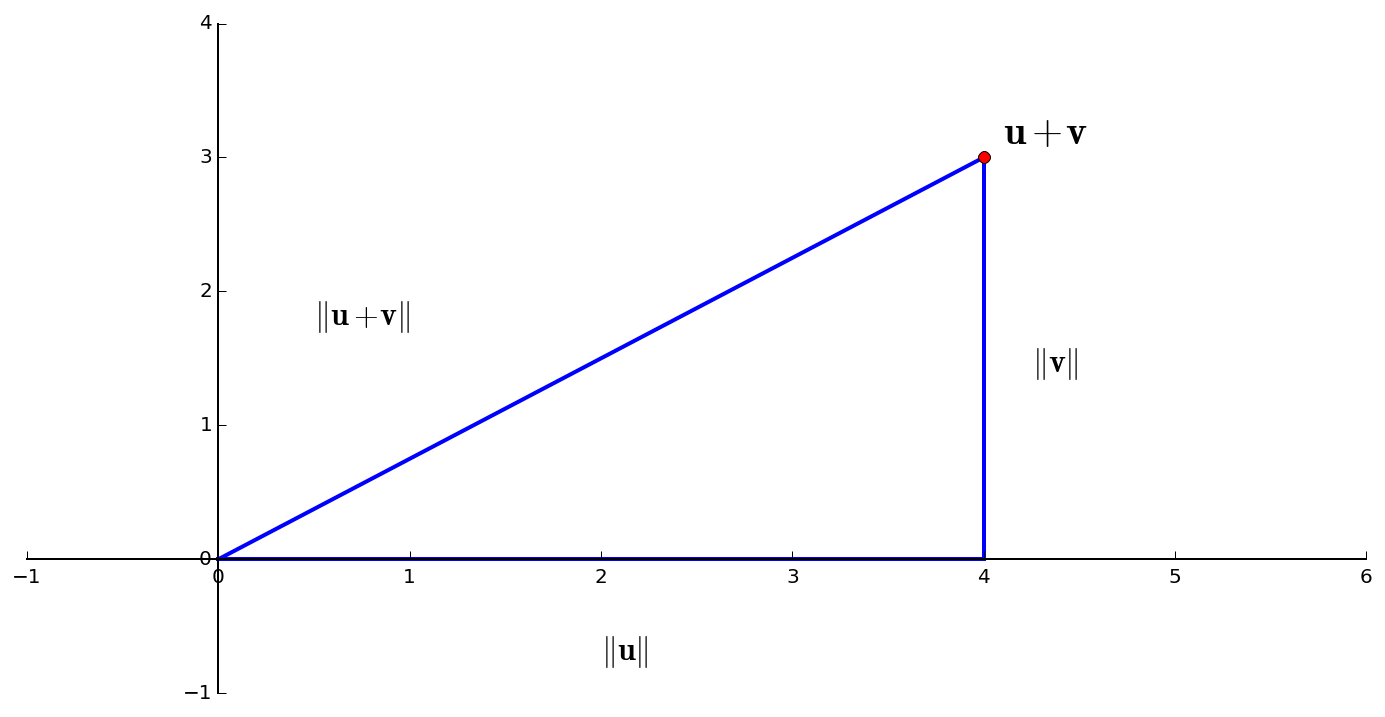

In [8]:
sl.hide_code_in_slideshow()
ax = ut.plotSetup(-1,6,-1,4,(12,6))
ut.centerAxes(ax)
u = np.array([4.,0])
v = np.array([0.,3])
pt = u + v
plt.plot([0,pt[0]],[0,pt[1]],'b-',lw=2)
plt.plot([pt[0],pt[0]],[0,pt[1]],'b-',lw=2)
plt.plot([0,pt[0]],[0,0],'b-',lw=2)
ut.plotVec(ax,pt)
ax.text(2,-0.75,r'$\Vert{\bf u}\Vert$',size=16)
ax.text(4.25,1.4,r'$\Vert{\bf v}\Vert$',size=16)
ax.text(0.5,1.75,r'$\Vert{\bf u+v}\Vert$',size=16)
ax.text(pt[0]+0.1,pt[1]+0.1,r'$\mathbf{u+v}$',size=20)
print('')

## Question Time!   Q20.2

## The Angle Between Two Vectors

There is an important connection between the inner product of two vectors and the __angle__ between them.

This connection is very useful (eg, in visualizing data mining operations).

We start from the __law of cosines:__

$$ c^2 = a^2 + b^2 - 2ab\cos\gamma$$

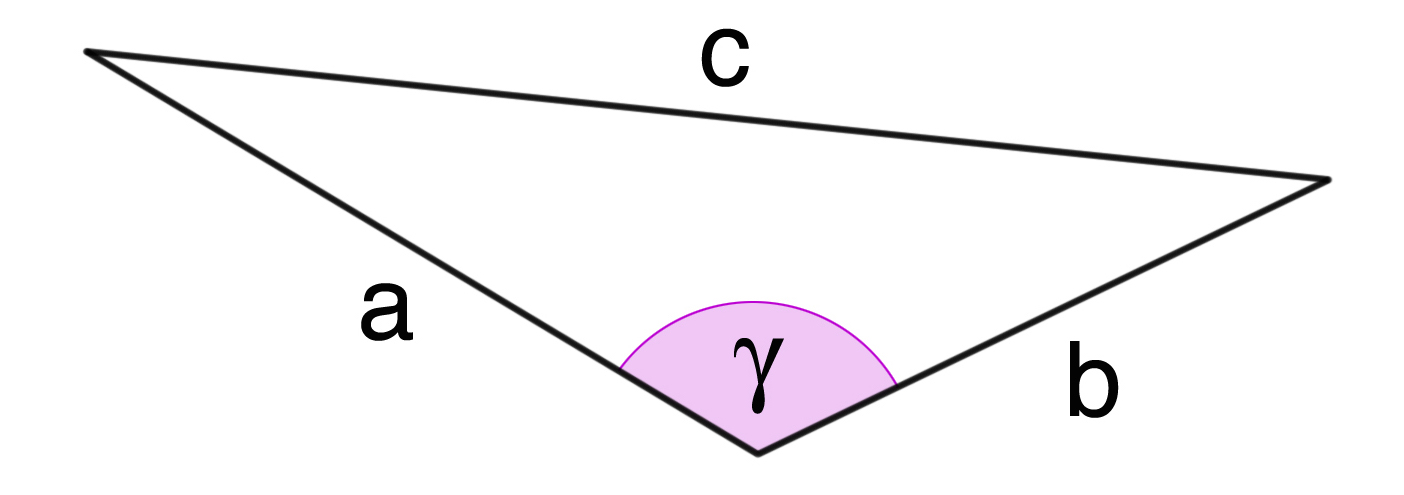

In [9]:
# image credit: Lay 4th edition figure 5 in Ch 6.1
sl.hide_code_in_slideshow()
display(Image("images/law_of_cosines.jpg", width=550))

Now let's interpret this law in terms of vectors $\vu$ and $\vv$:


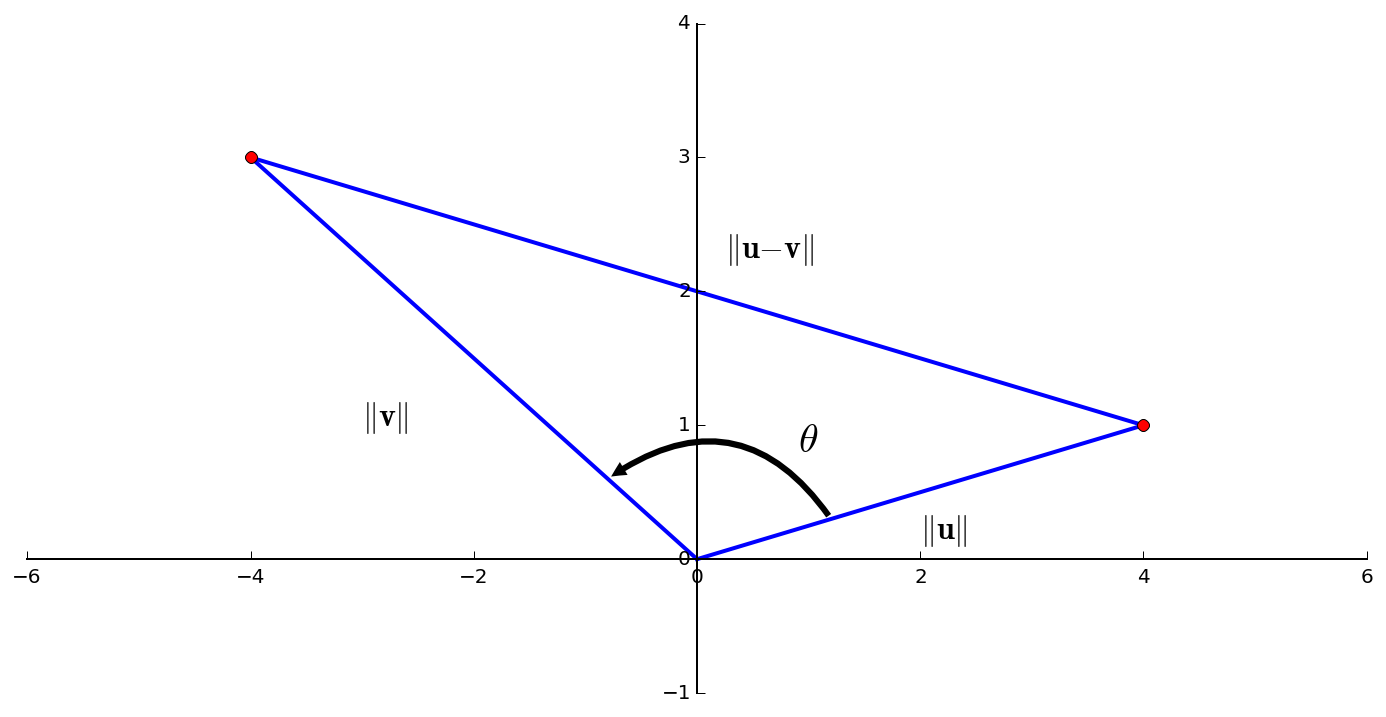

In [10]:
sl.hide_code_in_slideshow()
ax = ut.plotSetup(-6,6,-1,4,(12,6))
ut.centerAxes(ax)
u = np.array([4.,1])
v = np.array([-4.,3])
pt = u + v
plt.plot([u[0],v[0]],[u[1],v[1]],'b-',lw=2)
plt.plot([0,u[0]],[0,u[1]],'b-',lw=2)
plt.plot([0,v[0]],[0,v[1]],'b-',lw=2)
ut.plotVec(ax,u)
ut.plotVec(ax,v)
m = (u-v)/2.0
mm = v + m
ax.text(mm[0]+0.25,mm[1]+0.25,r'$\Vert{\bf u-v}\Vert$',size=16)
ax.text(2,0.15,r'$\Vert{\bf u}\Vert$',size=16)
ax.text(-3,1,r'$\Vert{\bf v}\Vert$',size=16)
ax.annotate('', xy=(0.2*v[0], 0.2*v[1]),  xycoords='data',
                xytext=(0.3*u[0], 0.3*u[1]), textcoords='data',
                size=15,
                #bbox=dict(boxstyle="round", fc="0.8"),
                arrowprops={'arrowstyle': 'simple',
                                'fc': '0', 
                                'ec': 'none',
                                'connectionstyle' : 'arc3,rad=0.5'},
                )
ax.text(0.9,0.8,r'$\theta$',size=20)
print('')

Applying the law of cosines we get:
    
$$\Vert\vu-\vv\Vert^2 = \Vert\vu\Vert^2 + \Vert\vv\Vert^2 - 2\Vert\vu\Vert\Vert\vv\Vert\cos\theta$$

Now, previously we calculated that:

$$  \Vert\vu-\vv\Vert^2 = (\vu-\vv)^T(\vu-\vv)$$

$$ = \Vert\vu\Vert^2 + \Vert\vv\Vert^2 - 2\vu^T\vv$$

Which means that 
$$ 2\vu^T\vv = 2\Vert\vu\Vert\Vert\vv\Vert\cos\theta$$

So 

$$ \vu^T\vv = \Vert\vu\Vert\Vert\vv\Vert\cos\theta$$

This is a __very__ important connection between the notion of inner product and trigonometry.

As a quick check, note that if $\vu$ and $\vv$ are nonzero, and $\vu^T\vv = 0$, then $\cos\theta = 0.$

In other words, the angle between $\vu$ and $\vv$ is 90 degrees (or 270 degrees).  So this agrees with our definition of orthogonality.

One implication in particular concerns __unit vectors.__

$$ \vu^T\vv = \Vert\vu\Vert\Vert\vv\Vert\cos\theta$$

So 

$$ \frac{\vu^T\vv}{\Vert\vu\Vert\Vert\vv\Vert} = \cos\theta$$

$$ \frac{\vu^T}{\Vert\vu\Vert}\frac{\vv}{\Vert\vv\Vert} = \cos\theta$$

Note that $\frac{\vu}{\Vert\vu\Vert}$ and $\frac{\vv}{\Vert\vv\Vert}$ are unit vectors.

So we have the very simple rule, that for two unit vectors, their inner product is the cosine of the angle between them!

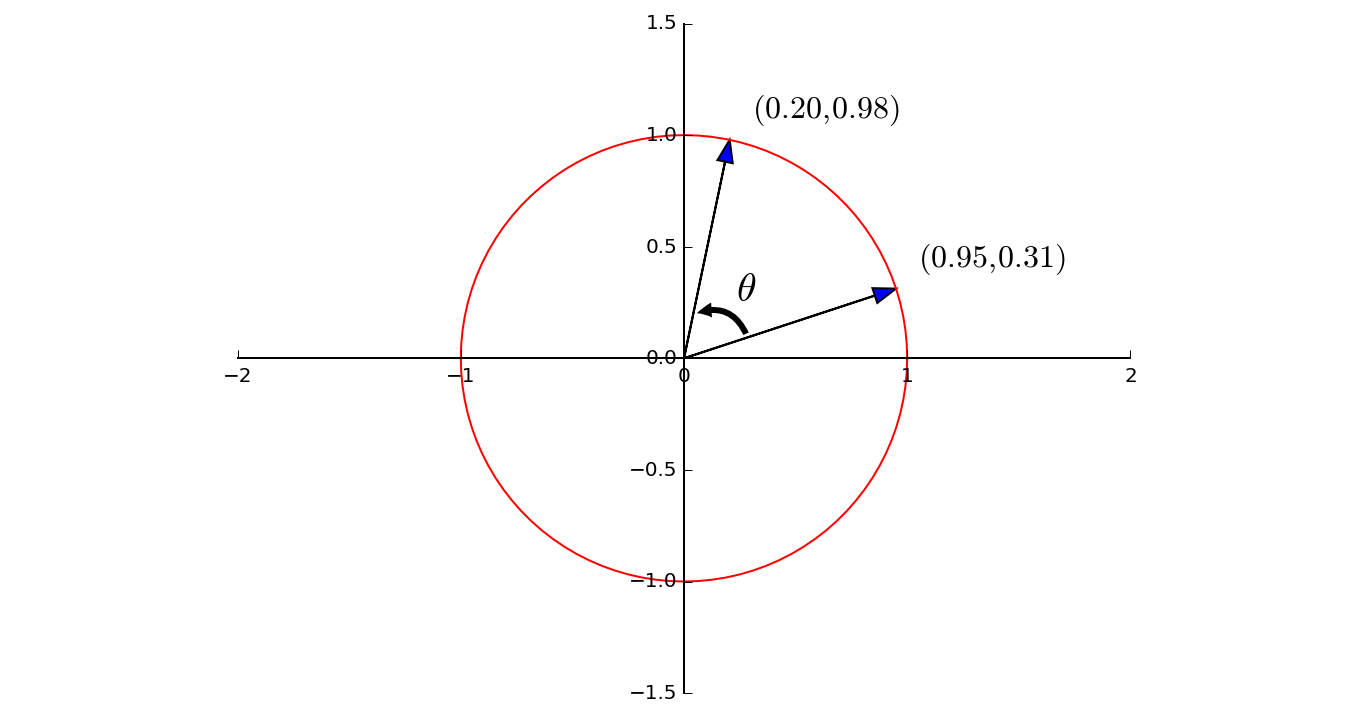

In [11]:
sl.hide_code_in_slideshow()
u = np.array([0.95, np.sin(np.arccos(0.95))])
theta = (np.pi/3)+np.arccos(0.95)
v = np.array([np.cos(theta), np.sin(theta)])
ax = ut.plotSetup(-1.3,1.3,-1.3,1.3,(12,6))
ut.centerAxes(ax)
plt.axis('equal')
angles = 2.0*np.pi * np.array(range(101))/100.0
plt.plot(np.cos(angles),np.sin(angles),'r-')
ax.arrow(0,0,u[0],u[1],head_width=0.07, head_length=0.1,length_includes_head = True)
ax.arrow(0,0,v[0],v[1],head_width=0.07, head_length=0.1,length_includes_head = True)
ax.annotate('', xy=(0.2*v[0], 0.2*v[1]),  xycoords='data',
                xytext=(0.3*u[0], 0.3*u[1]), textcoords='data',
                size=15,
                #bbox=dict(boxstyle="round", fc="0.8"),
                arrowprops={'arrowstyle': 'simple',
                                'fc': '0', 
                                'ec': 'none',
                                'connectionstyle' : 'arc3,rad=0.5'})
mid = 0.4*(u+v)/2.0
ax.text(mid[0],mid[1],r'$\theta$',size=20)
ax.text(u[0]+.1,u[1]+.1,r'$(%0.2f,%0.2f)$'% (u[0],u[1]),size=16)
ax.text(v[0]+.1,v[1]+.1,r'$(%0.2f,%0.2f)$'% (v[0],v[1]),size=16)
print('')

Here $\vu = \mat{{c}0.95\\0.31},$ and $\vv = \mat{{c}0.20\\0.98}.$

So $\vu^T\vv = (0.95\cdot 0.20) + (0.31 \cdot 0.98) = 0.5$

So $\cos\theta = 0.5.$

So $\theta = 60$ degrees.

__Example.__ Find the angle formed by the vectors:

$$\vu = \mat{{r}1\\3\\-7\\-2} \;\;\mbox{and}\;\; \vv = \mat{{r}8\\-2\\4\\6}$$

__Solution.__

First normalize the vectors:

$$\Vert\vu\Vert = \sqrt{1^2 + 3^2 + (-7)^2 + (-2)^2} = 7.93 $$
$$\Vert\vv\Vert = \sqrt{8^2 + (-2)^2 + 4^2 + 6^2} = 10.95 $$

So 

$$\frac{\vu}{\Vert\vu\Vert} = \mat{{r}0.13\\0.38\\-0.88\\-0.25}
\;\;\mbox{and}\;\;\frac{\vv}{\Vert\vv\Vert} = \mat{{r}0.73\\-0.18\\0.36\\0.54}$$

Then calculate the cosine of the angle between them:

$$\cos\theta = \frac{\vu^T}{\Vert\vu\Vert}\frac{\vv}{\Vert\vv\Vert}$$

$$ = (0.13\cdot0.73)+(0.38\cdot -0.18)+(-0.88\cdot 0.36)+(-0.25\cdot0.54)$$

$$= -0.44$$

Then:

$$\theta = \cos^{-1}(-0.44)$$

$$= 116\;\mbox{degrees.}$$

In [12]:
u = np.array([1.,3,-7,-2])
print (u/np.sqrt(u.T.dot(u)))
v = np.array([8.,-2,4,6])
print(v/np.sqrt(v.T.dot(v)))
print((v/np.sqrt(v.T.dot(v)).T).dot(u/np.sqrt(u.T.dot(u))))
print(180*np.arccos((v/np.sqrt(v.T.dot(v)).T).dot(u/np.sqrt(u.T.dot(u))))/np.pi)

[ 0.12598816  0.37796447 -0.8819171  -0.25197632]
[ 0.73029674 -0.18257419  0.36514837  0.54772256]
-0.437041520917
115.915270339
